# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/datasets/ealaxi/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [21]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fraud = pd.read_csv('PS_20174392719_1491204439457_log.csv')
fraud = fraud.sample(n=100000)


In [22]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3593847,262,PAYMENT,12538.45,C255023630,356762.0,344223.55,M1112603870,0.00,0.00,0,0
2722088,211,CASH_OUT,253825.99,C1984159794,0.0,0.00,C1217752015,347979.65,601805.65,0,0
2616957,208,PAYMENT,6090.99,C2022078181,79081.0,72990.01,M1005647821,0.00,0.00,0,0
1880410,164,PAYMENT,14484.02,C1699008849,40690.0,26205.98,M2111976889,0.00,0.00,0,0
3652048,275,PAYMENT,8536.81,C535680249,13308.0,4771.19,M2039821042,0.00,0.00,0,0


In [23]:
fraud.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [24]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.0
mean,242.786080,1.772766e+05,8.495228e+05,8.709359e+05,1.101350e+06,1.222557e+06,0.001320,0.0
std,142.666463,5.738441e+05,2.915090e+06,2.951387e+06,3.607839e+06,3.845137e+06,0.036308,0.0
min,1.000000,6.500000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.333940e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.428410e+04,1.437817e+04,0.000000e+00,1.338473e+05,2.137350e+05,0.000000,0.0
75%,334.000000,2.063945e+05,1.092326e+05,1.473947e+05,9.513540e+05,1.120131e+06,0.000000,0.0
max,742.000000,6.329484e+07,3.729746e+07,3.753800e+07,3.553814e+08,3.551855e+08,1.000000,0.0


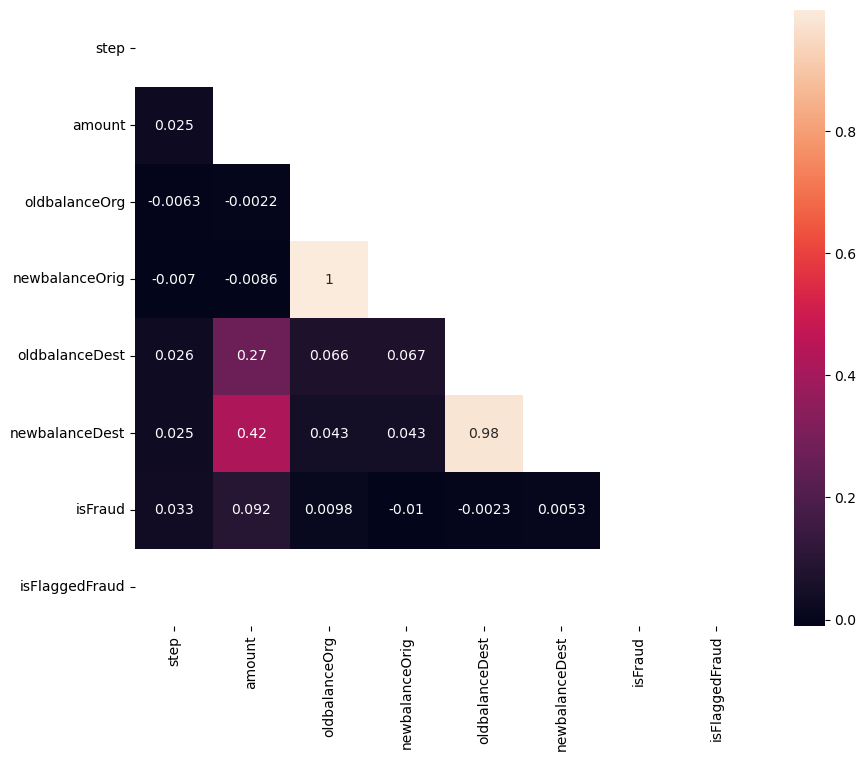

In [25]:
corr_matrix = fraud.corr()

mask = np.triu(np.ones_like(fraud.corr()))

plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,annot=True,mask=mask)

plt.show()

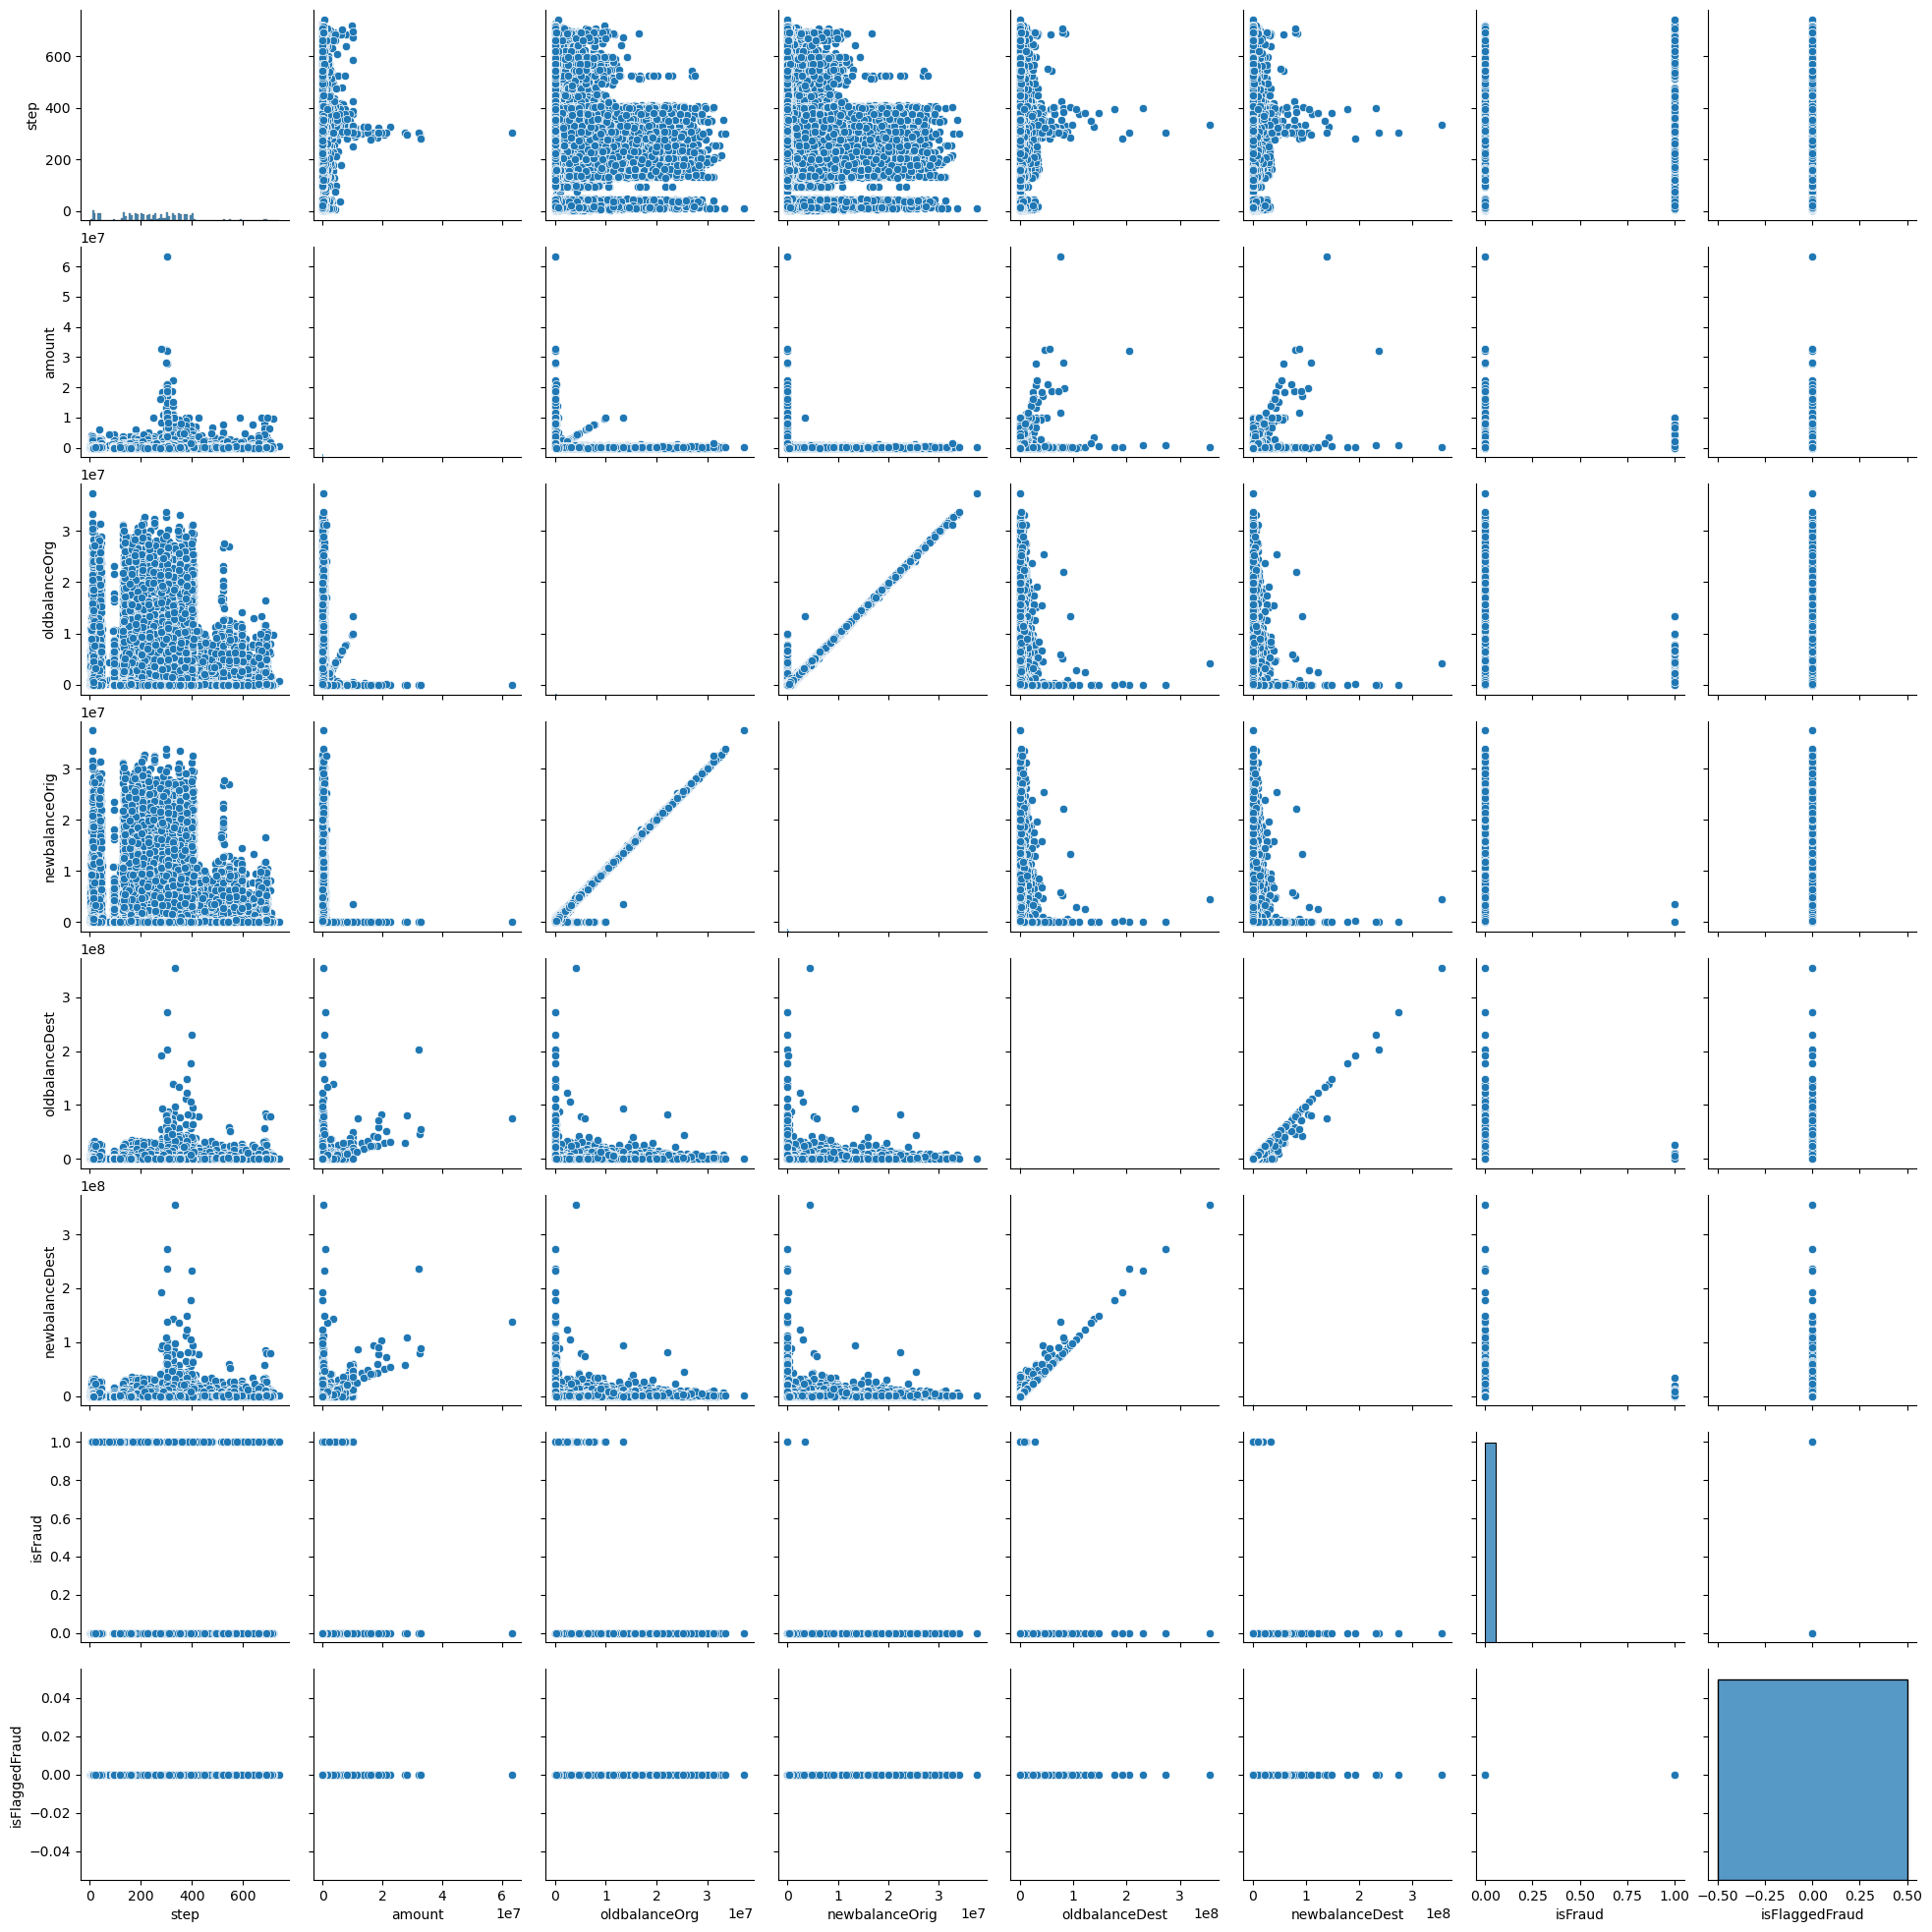

In [26]:
sns.pairplot(data= fraud)

plt.show()

In [27]:
fraud['type'].value_counts()

CASH_OUT    35067
PAYMENT     33893
CASH_IN     22196
TRANSFER     8214
DEBIT         630
Name: type, dtype: int64

### What is the distribution of the outcome? 

0    99868
1      132
Name: isFraud, dtype: int64


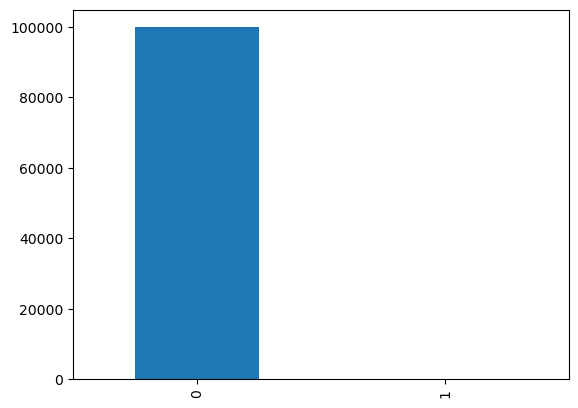

In [28]:
# Your response here

count_classes = pd.value_counts(fraud['isFraud']) 

count_classes.plot(kind = 'bar')

print(pd.value_counts(fraud['isFraud']))


plt.show()

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [5]:
# Your code here
categ_col = (fraud.select_dtypes(include=['object'])).columns.tolist()
categ_col

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [29]:
fraud = fraud.drop(columns=['nameOrig','nameDest'])

# with one-hot encoding using the function get_dummies
fraud = pd.get_dummies(data=fraud,columns=['type'])

In [30]:
fraud = fraud.drop(columns=['oldbalanceDest', 'oldbalanceOrg'])

In [31]:
fraud.dtypes


step                int64
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
type_CASH_IN        uint8
type_CASH_OUT       uint8
type_DEBIT          uint8
type_PAYMENT        uint8
type_TRANSFER       uint8
dtype: object

### Run a logisitc regression classifier and evaluate its accuracy.

In [32]:
from sklearn.model_selection import train_test_split

# Your code here:

y = fraud['isFraud']
X = fraud.drop('isFraud',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state =42)



In [33]:
# Your code here

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9977


### Now pick a model of your choice and evaluate its accuracy.

In [34]:
# Your code here
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred =rf.predict(X_test)
rf.score(y_test, y_pred)
print('Accuracy:', accuracy)

C:\Users\Rui Almeida\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Which model worked better and how do you know?

In [2]:
# Your response here

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.